### 1. Возьмите датасет Mortality and Water Hardness
https://www.kaggle.com/ukveteran/mortality-and-water-hardness

Дополнительно будет выложен в ЛК
В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

In [1]:
import pandas as pd


water = pd.read_csv("data/water.csv", index_col=0)
water

,location,town,mortality,hardness
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18
...,...,...,...,...
57,South,Walsall,1527,60
58,South,West Bromwich,1627,53
59,South,West Ham,1486,122
60,South,Wolverhampton,1485,81


### 2. Ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

* Построить точечный график
* Рассчитать коэффициенты корреляции Пирсона и Спирмена
* Построить модель линейной регрессии
* Рассчитать коэффициент детерминации
* Вывести график остатков


<AxesSubplot:title={'center':'Корреляция между hardness и mortality'}, xlabel='hardness', ylabel='mortality'>

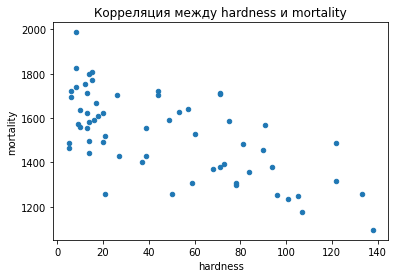

In [2]:
water.plot(kind="scatter", x='hardness', y='mortality', title='Корреляция между hardness и mortality')

In [3]:
# коэффициенты корреляции
pearson = water.corr(method='pearson').loc['hardness', 'mortality'].round(4)
spearman = water.corr(method='spearman').loc['hardness', 'mortality'].round(4)
print(f'Коэффициенты корреляции. Пирсон: {pearson}, Спирмен: {spearman}')

Коэффициенты корреляции. Пирсон: -0.6548, Спирмен: -0.6317


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = water[['hardness']]
y = water['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Модель линейной регресси

In [5]:
coef = model.coef_[0].round(2)
intercept = model.intercept_.round(2)
determination = model.score(X_test, y_test).round(4)


print(f'Модель линейной регрессии: y = {coef}*x + {intercept}')
print(f'Коэффициент детерминации: {determination}')

Модель линейной регрессии: y = -3.13*x + 1668.97
Коэффициент детерминации: 0.5046


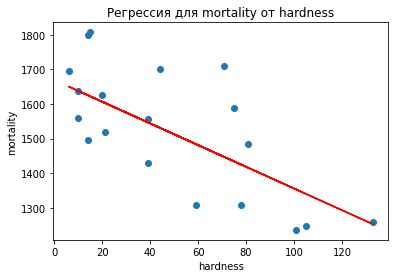

In [6]:
import matplotlib.pyplot as plt

y_pred_test = model.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(X_test, y_test)
ax.plot(X_test, y_pred_test, c='r')

ax.set_xlabel('hardness')
ax.set_ylabel('mortality')
plt.title('Регрессия для mortality от hardness')
plt.show()

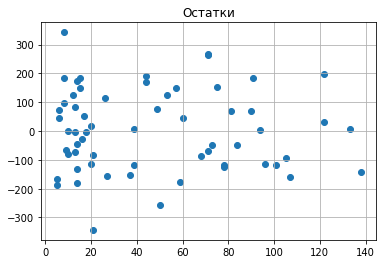

In [7]:
y_pred = model.predict(X)
residuals = y - y_pred
plt.scatter(X, residuals)
plt.title('Остатки')
plt.grid(True)

## Результаты и выводы

Результаты:

    Коэффициенты корреляции. Пирсон: -0.6548, Спирмен: -0.6317
    Модель линейной регрессии: y = -3.13*x + 1668.97
    Коэффициент детерминации: 0.5046

Выводы:
* Наблюдается заметная(?) отрицательная корреляция между жесткостью воды и смертностью.
* На основе имеющихся данных была получена модель линейной регрессии, которая неплохо(?) подходит для прогнозирования.